In [2]:
# import libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# read in clean data csv
df = pd.read_csv('./data/ship_clean.csv')

In [4]:
# increasing max columns / rows display in Pandas
pd.set_option('display.max_rows', 1_000)
pd.set_option('display.max_columns', 500)

In [5]:
# inspect first 5 rows
df.head()

,type,actual_ship_days,estimated_ship_days,delivery_status,late_delivery_risk,category_id,category_name,customer_city,customer_id,customer_segment,customer_state,customer_zipcode,department_name,latitude,longitude,market,order_city,order_country,order_date,order_id,order_item_discount_rate,order_item_profit_ratio,order_item_quantity,order_region,order_state,order_status,product_card_id,product_name,product_price,shipping_date,shipping_mode,ship_performance,ontime,is_fraud
0,DEBIT,3,4,Advance shipping,0,73,Sporting Goods,Caguas,20755,Consumer,PR,725.0,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,2018-01-31 22:56:00,77202,0.04,0.29,1,Southeast Asia,Java Occidental,COMPLETE,1360,Smart watch,327.75,2018-02-03 22:56:00,Standard Class,-1,1,0
1,TRANSFER,5,4,Late delivery,1,73,Sporting Goods,Caguas,19492,Consumer,PR,725.0,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,2018-01-13 12:27:00,75939,0.05,-0.80,1,South Asia,Rajastán,PENDING,1360,Smart watch,327.75,2018-01-18 12:27:00,Standard Class,1,0,0
2,CASH,4,4,Shipping on time,0,73,Sporting Goods,San Jose,19491,Consumer,CA,95125.0,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,2018-01-13 12:06:00,75938,0.06,-0.80,1,South Asia,Rajastán,CLOSED,1360,Smart watch,327.75,2018-01-17 12:06:00,Standard Class,0,1,0
3,DEBIT,3,4,Advance shipping,0,73,Sporting Goods,Los Angeles,19490,Home Office,CA,90027.0,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,2018-01-13 11:45:00,75937,0.07,0.08,1,Oceania,Queensland,COMPLETE,1360,Smart watch,327.75,2018-01-16 11:45:00,Standard Class,-1,1,0
4,PAYMENT,2,4,Advance shipping,0,73,Sporting Goods,Caguas,19489,Corporate,PR,725.0,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,2018-01-13 11:24:00,75936,0.09,0.45,1,Oceania,Queensland,PENDING_PAYMENT,1360,Smart watch,327.75,2018-01-15 11:24:00,Standard Class,-2,1,0


In [6]:
# inspect columns and dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 34 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   type                      180519 non-null  object 
 1   actual_ship_days          180519 non-null  int64  
 2   estimated_ship_days       180519 non-null  int64  
 3   delivery_status           180519 non-null  object 
 4   late_delivery_risk        180519 non-null  int64  
 5   category_id               180519 non-null  int64  
 6   category_name             180519 non-null  object 
 7   customer_city             180519 non-null  object 
 8   customer_id               180519 non-null  int64  
 9   customer_segment          180519 non-null  object 
 10  customer_state            180519 non-null  object 
 11  customer_zipcode          180516 non-null  float64
 12  department_name           180519 non-null  object 
 13  latitude                  180519 non-null  f

---

# Understanding Shipping Performance

In [7]:
# percentages for on time vs late shipping
df['ontime'].value_counts(normalize = True)

0    0.572793
1    0.427207
Name: ontime, dtype: float64

In [8]:
# ship performance - number of days early / late shipping
df['ship_performance'].value_counts()

 1    60647
 0    33753
 2    28718
-1    21700
-2    21666
 3     7052
 4     6983
Name: ship_performance, dtype: int64

---

# Fraud

In [9]:
fraud = df[df['order_status'] == 'SUSPECTED_FRAUD']
fraud.head(2)

,type,actual_ship_days,estimated_ship_days,delivery_status,late_delivery_risk,category_id,category_name,customer_city,customer_id,customer_segment,customer_state,customer_zipcode,department_name,latitude,longitude,market,order_city,order_country,order_date,order_id,order_item_discount_rate,order_item_profit_ratio,order_item_quantity,order_region,order_state,order_status,product_card_id,product_name,product_price,shipping_date,shipping_mode,ship_performance,ontime,is_fraud
10,TRANSFER,6,2,Shipping canceled,0,73,Sporting Goods,Caguas,19483,Corporate,PR,725.0,Fitness,18.282845,-66.037056,Pacific Asia,Tokio,Japón,2018-01-13 09:18:00,75930,0.17,0.48,1,Eastern Asia,Tokio,SUSPECTED_FRAUD,1360,Smart watch,327.75,2018-01-19 09:18:00,Second Class,4,0,1
24,TRANSFER,2,2,Shipping canceled,0,73,Sporting Goods,Billings,19469,Corporate,MT,59102.0,Fitness,45.788311,-108.559410,Pacific Asia,Brisbane,Australia,2018-01-13 04:24:00,75916,0.12,0.31,1,Oceania,Queensland,SUSPECTED_FRAUD,1360,Smart watch,327.75,2018-01-15 04:24:00,Second Class,0,1,1


In [10]:
df['order_status'].value_counts(normalize = False)

COMPLETE           59491
PENDING_PAYMENT    39832
PROCESSING         21902
PENDING            20227
CLOSED             19616
ON_HOLD             9804
SUSPECTED_FRAUD     4062
CANCELED            3692
PAYMENT_REVIEW      1893
Name: order_status, dtype: int64

In [11]:
# anything cancelled or suspected of fraud will have a delivery status of 'Shipping cancelled'. Unsure why these are still showing a value for actual ship days
df.loc[df['delivery_status'] == 'Shipping canceled']['order_status'].value_counts()

SUSPECTED_FRAUD    4062
CANCELED           3692
Name: order_status, dtype: int64

In [67]:
# percentage of total shipments marked as potential fraud
df['is_fraud'].value_counts(normalize = True)

0    0.977498
1    0.022502
Name: is_fraud, dtype: float64

In [12]:
df.groupby('customer_segment')['is_fraud'].mean()

customer_segment
Consumer       0.023689
Corporate      0.020661
Home Office    0.022187
Name: is_fraud, dtype: float64

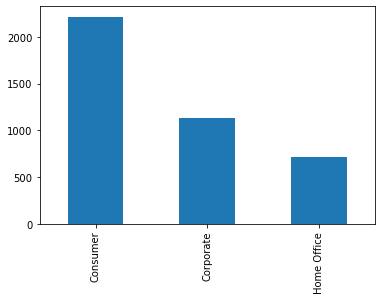

In [70]:
# fraud by customer segment
fraud['customer_segment'].value_counts().plot(kind = 'bar');

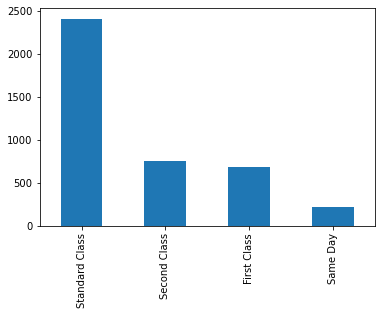

In [73]:
# shipping mode of fraudulent shipments
fraud['shipping_mode'].value_counts().plot(kind = 'bar');

# Non-Cancelled Shipments

In [13]:
# creating a dataframe with cancelled shipments dropped
not_cancelled = df[df['delivery_status'] != 'Shipping canceled']
not_cancelled.head(2)

,type,actual_ship_days,estimated_ship_days,delivery_status,late_delivery_risk,category_id,category_name,customer_city,customer_id,customer_segment,customer_state,customer_zipcode,department_name,latitude,longitude,market,order_city,order_country,order_date,order_id,order_item_discount_rate,order_item_profit_ratio,order_item_quantity,order_region,order_state,order_status,product_card_id,product_name,product_price,shipping_date,shipping_mode,ship_performance,ontime
0,DEBIT,3,4,Advance shipping,0,73,Sporting Goods,Caguas,20755,Consumer,PR,725.0,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,2018-01-31 22:56:00,77202,0.04,0.29,1,Southeast Asia,Java Occidental,COMPLETE,1360,Smart watch,327.75,2018-02-03 22:56:00,Standard Class,-1,1
1,TRANSFER,5,4,Late delivery,1,73,Sporting Goods,Caguas,19492,Consumer,PR,725.0,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,2018-01-13 12:27:00,75939,0.05,-0.80,1,South Asia,Rajast�n,PENDING,1360,Smart watch,327.75,2018-01-18 12:27:00,Standard Class,1,0


In [14]:
not_cancelled['ontime'].value_counts(normalize=True)

0    0.5729
1    0.4271
Name: ontime, dtype: float64

In [15]:
# review final delivery status
not_cancelled['delivery_status'].value_counts()

Late delivery       98977
Advance shipping    41592
Shipping on time    32196
Name: delivery_status, dtype: int64

In [16]:
not_cancelled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172765 entries, 0 to 180518
Data columns (total 33 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   type                      172765 non-null  object 
 1   actual_ship_days          172765 non-null  int64  
 2   estimated_ship_days       172765 non-null  int64  
 3   delivery_status           172765 non-null  object 
 4   late_delivery_risk        172765 non-null  int64  
 5   category_id               172765 non-null  int64  
 6   category_name             172765 non-null  object 
 7   customer_city             172765 non-null  object 
 8   customer_id               172765 non-null  int64  
 9   customer_segment          172765 non-null  object 
 10  customer_state            172765 non-null  object 
 11  customer_zipcode          172762 non-null  float64
 12  department_name           172765 non-null  object 
 13  latitude                  172765 non-null  f

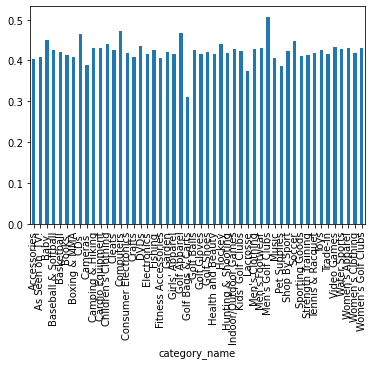

In [17]:
not_cancelled.groupby('category_name')['ontime'].mean().plot(kind = 'bar');

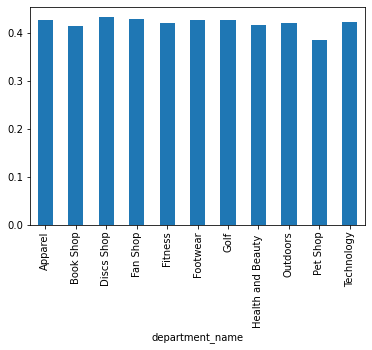

In [18]:
not_cancelled.groupby('department_name')['ontime'].mean().plot(kind = 'bar');

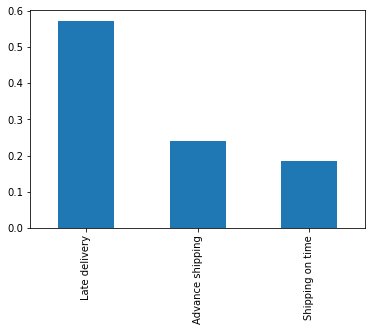

In [19]:
# review percent breakdown of final delivery status
not_cancelled['delivery_status'].value_counts(normalize = True).plot(kind = 'bar');

In [20]:
not_cancelled.groupby('shipping_mode')['ontime'].mean().sort_values(ascending = False)

shipping_mode
Standard Class    0.602309
Same Day          0.520715
Second Class      0.201710
First Class       0.000000
Name: ontime, dtype: float64

In [21]:
df.groupby('shipping_mode')[['actual_ship_days', 'estimated_ship_days']].mean()

,actual_ship_days,estimated_ship_days
shipping_mode,,
First Class,2.000000,1.0
Same Day,0.478279,0.0
Second Class,3.990828,2.0
Standard Class,3.995907,4.0


In [22]:
df[df['delivery_status'] == 'Late delivery']

,type,actual_ship_days,estimated_ship_days,delivery_status,late_delivery_risk,category_id,category_name,customer_city,customer_id,customer_segment,customer_state,customer_zipcode,department_name,latitude,longitude,market,order_city,order_country,order_date,order_id,order_item_discount_rate,order_item_profit_ratio,order_item_quantity,order_region,order_state,order_status,product_card_id,product_name,product_price,shipping_date,shipping_mode,ship_performance,ontime
1,TRANSFER,5,4,Late delivery,1,73,Sporting Goods,Caguas,19492,Consumer,PR,725.0,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,2018-01-13 12:27:00,75939,0.05,-0.80,1,South Asia,Rajast�n,PENDING,1360,Smart watch,327.750000,2018-01-18 12:27:00,Standard Class,1,0
6,DEBIT,2,1,Late delivery,1,73,Sporting Goods,Caguas,19487,Home Office,PR,725.0,Fitness,18.242538,-66.037056,Pacific Asia,Guangzhou,China,2018-01-13 10:42:00,75934,0.12,0.33,1,Eastern Asia,Guangdong,COMPLETE,1360,Smart watch,327.750000,2018-01-15 10:42:00,First Class,1,0
7,TRANSFER,2,1,Late delivery,1,73,Sporting Goods,Miami,19486,Corporate,FL,33162.0,Fitness,25.928869,-80.162872,Pacific Asia,Guangzhou,China,2018-01-13 10:21:00,75933,0.13,0.24,1,Eastern Asia,Guangdong,PROCESSING,1360,Smart watch,327.750000,2018-01-15 10:21:00,First Class,1,0
8,CASH,3,2,Late delivery,1,73,Sporting Goods,Caguas,19485,Corporate,PR,725.0,Fitness,18.233223,-66.037056,Pacific Asia,Guangzhou,China,2018-01-13 10:00:00,75932,0.15,0.48,1,Eastern Asia,Guangdong,CLOSED,1360,Smart watch,327.750000,2018-01-16 10:00:00,Second Class,1,0
9,CASH,2,1,Late delivery,1,73,Sporting Goods,San Ramon,19484,Corporate,CA,94583.0,Fitness,37.773991,-121.966629,Pacific Asia,Guangzhou,China,2018-01-13 09:39:00,75931,0.16,0.48,1,Eastern Asia,Guangdong,CLOSED,1360,Smart watch,327.750000,2018-01-15 09:39:00,First Class,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180507,PAYMENT,5,2,Late delivery,1,45,Fishing,Philadelphia,8247,Consumer,PA,19134.0,Fan Shop,39.986546,-75.108467,Pacific Asia,Hanoi,Vietnam,2016-01-16 09:16:00,26059,0.13,0.14,1,Southeast Asia,Th? D� H� N?i,PAYMENT_REVIEW,1004,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,2016-01-21 09:16:00,Second Class,3,0
180508,DEBIT,4,2,Late delivery,1,45,Fishing,Waipahu,8387,Corporate,HI,96797.0,Fan Shop,21.394211,-157.998016,Pacific Asia,Guangshui,China,2016-01-16 07:10:00,26053,0.15,0.25,1,Eastern Asia,Hubei,COMPLETE,1004,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,2016-01-20 07:10:00,Second Class,2,0
180512,DEBIT,6,4,Late delivery,1,45,Fishing,Caguas,7396,Home Office,PR,725.0,Fan Shop,18.245256,-66.370621,Pacific Asia,Chengdu,China,2016-01-16 06:07:00,26050,0.20,0.27,1,Eastern Asia,Sichuan,COMPLETE,1004,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,2016-01-22 06:07:00,Standard Class,2,0
180515,DEBIT,3,2,Late delivery,1,45,Fishing,Bakersfield,9141,Corporate,CA,93304.0,Fan Shop,35.362545,-119.018700,Pacific Asia,Hirakata,Jap�n,2016-01-16 01:34:00,26037,0.01,-1.55,1,Eastern Asia,Osaka,COMPLETE,1004,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,2016-01-19 01:34:00,Second Class,1,0


In [23]:
df[['shipping_mode', 'actual_ship_days', 'estimated_ship_days', 'order_date', 'shipping_date', 'delivery_status', 'late_delivery_risk']]

,shipping_mode,actual_ship_days,estimated_ship_days,order_date,shipping_date,delivery_status,late_delivery_risk
0,Standard Class,3,4,2018-01-31 22:56:00,2018-02-03 22:56:00,Advance shipping,0
1,Standard Class,5,4,2018-01-13 12:27:00,2018-01-18 12:27:00,Late delivery,1
2,Standard Class,4,4,2018-01-13 12:06:00,2018-01-17 12:06:00,Shipping on time,0
3,Standard Class,3,4,2018-01-13 11:45:00,2018-01-16 11:45:00,Advance shipping,0
4,Standard Class,2,4,2018-01-13 11:24:00,2018-01-15 11:24:00,Advance shipping,0
...,...,...,...,...,...,...,...
180514,Standard Class,4,4,2016-01-16 03:40:00,2016-01-20 03:40:00,Shipping on time,0
180515,Second Class,3,2,2016-01-16 01:34:00,2016-01-19 01:34:00,Late delivery,1
180516,Standard Class,5,4,2016-01-15 21:00:00,2016-01-20 21:00:00,Late delivery,1
180517,Standard Class,3,4,2016-01-15 20:18:00,2016-01-18 20:18:00,Advance shipping,0


In [24]:
df[df['shipping_mode'] == 'First Class'][['actual_ship_days', 'order_date', 'shipping_date']]

,actual_ship_days,order_date,shipping_date
6,2,2018-01-13 10:42:00,2018-01-15 10:42:00
7,2,2018-01-13 10:21:00,2018-01-15 10:21:00
9,2,2018-01-13 09:39:00,2018-01-15 09:39:00
13,2,2018-01-13 08:15:00,2018-01-15 08:15:00
14,2,2018-01-13 07:54:00,2018-01-15 07:54:00
...,...,...,...
180442,2,2016-01-20 12:04:00,2016-01-22 12:04:00
180467,2,2016-01-18 19:05:00,2016-01-20 19:05:00
180470,2,2016-01-18 16:16:00,2016-01-20 16:16:00
180472,2,2016-01-18 12:04:00,2016-01-20 12:04:00


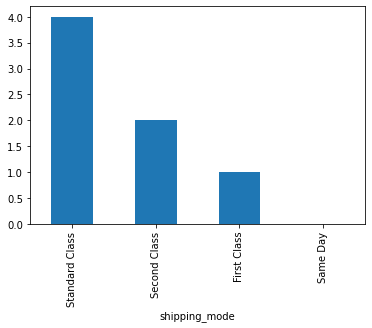

In [25]:
not_cancelled.groupby('shipping_mode')['estimated_ship_days'].mean().sort_values(ascending = False).plot(kind = 'bar');

In [27]:
# Puerto Rico is the source of the majority of fraud (~40%)
fraud['customer_city'].value_counts(normalize = True)[:10]

Caguas          0.389710
Chicago         0.019695
Los Angeles     0.017725
Brooklyn        0.013540
Philadelphia    0.010340
Bronx           0.010094
San Diego       0.010094
Las Vegas       0.008370
Miami           0.007878
New York        0.007632
Name: customer_city, dtype: float64

In [28]:
not_cancelled.groupby('shipping_mode').mean()

,actual_ship_days,estimated_ship_days,late_delivery_risk,category_id,customer_id,customer_zipcode,latitude,longitude,order_id,order_item_discount_rate,order_item_profit_ratio,order_item_quantity,product_card_id,product_price,ship_performance,ontime
shipping_mode,,,,,,,,,,,,,,,,
First Class,2.000000,1.0,1.000000,31.795911,6684.146004,35744.491362,29.640956,-84.855701,36175.680685,0.100963,0.127290,2.132312,691.484442,141.320052,1.000000,0.000000
Same Day,0.479285,0.0,0.479285,31.904659,6687.270634,36752.816421,30.101584,-85.508276,36532.410954,0.102181,0.117333,2.148929,693.893038,136.163898,0.479285,0.520715
Second Class,3.993167,2.0,0.798290,31.887032,6655.379518,36254.439626,29.833141,-85.008602,36151.930338,0.102054,0.118584,2.125362,693.146187,140.544882,1.993167,0.201710
Standard Class,3.993699,4.0,0.397691,31.856999,6699.343335,35799.922783,29.675803,-84.842115,36217.460365,0.101604,0.120172,2.125357,692.622822,141.969177,-0.006301,0.602309


In [29]:
not_cancelled['shipping_mode'].value_counts()

Standard Class    103153
Second Class       33806
First Class        26513
Same Day            9293
Name: shipping_mode, dtype: int64

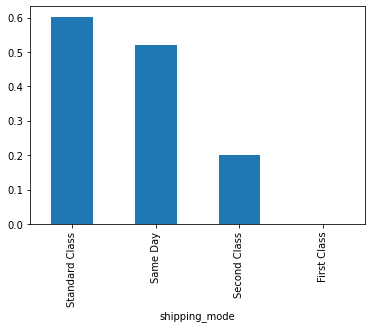

In [30]:
not_cancelled.groupby('shipping_mode')['ontime'].mean().sort_values(ascending = False).plot(kind = 'bar');

In [31]:
not_cancelled['customer_state'].isnull().sum()

0

In [32]:
not_cancelled['customer_state'].value_counts(normalize = False)

PR       66340
CA       27920
NY       10887
TX        8765
IL        7309
FL        5223
OH        3907
PA        3658
MI        3652
NJ        3027
AZ        2915
GA        2405
MD        2298
NC        1873
CO        1843
VA        1797
OR        1593
MA        1534
TN        1502
NV        1385
MO        1301
HI        1176
CT        1055
UT         933
NM         908
LA         891
WA         887
WI         813
SC         644
MN         626
IN         566
DC         547
KY         473
KS         449
DE         258
RI         241
WV         235
OK         226
ND         201
ID         162
AR         159
MT          77
IA          66
AL          35
95758        2
91732        1
Name: customer_state, dtype: int64

In [33]:
not_cancelled['order_region'].value_counts(normalize = True)

Central America    0.157289
Western Europe     0.149724
South America      0.082100
Oceania            0.056337
Northern Europe    0.054455
Southeast Asia     0.052881
Southern Europe    0.052268
Caribbean          0.046022
West of USA        0.043961
South Asia         0.043151
Eastern Asia       0.040361
East of USA        0.038301
West Asia          0.033259
US Center          0.032721
South of  USA      0.022314
Eastern Europe     0.021908
West Africa        0.020670
North Africa       0.017862
East Africa        0.010309
Central Africa     0.009354
Southern Africa    0.006367
Canada             0.005250
Central Asia       0.003137
Name: order_region, dtype: float64

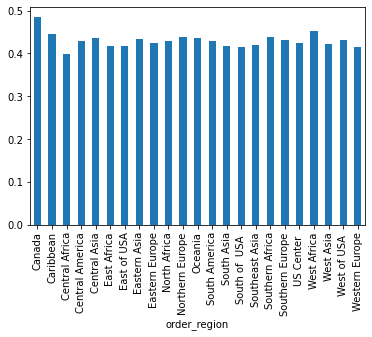

In [34]:
# ontime ship performance by region
not_cancelled.groupby('order_region')['ontime'].mean().plot(kind = 'bar');

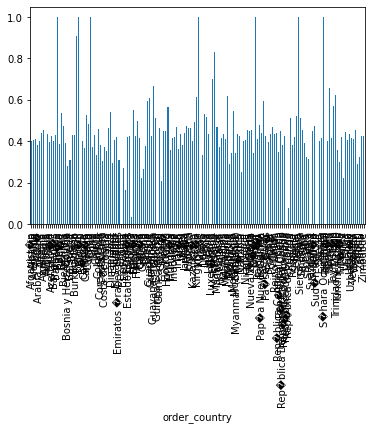

In [35]:
# ontime ship performance by country - unreadable
not_cancelled.groupby('order_country')['ontime'].mean().plot(kind = 'bar');

In [36]:
# checking unique number of cities
not_cancelled['order_city'].nunique()

3585

In [37]:
# checking unique number of countries
not_cancelled['order_country'].nunique()

164

In [38]:
# checking unique number of regions
not_cancelled['order_region'].nunique()

23

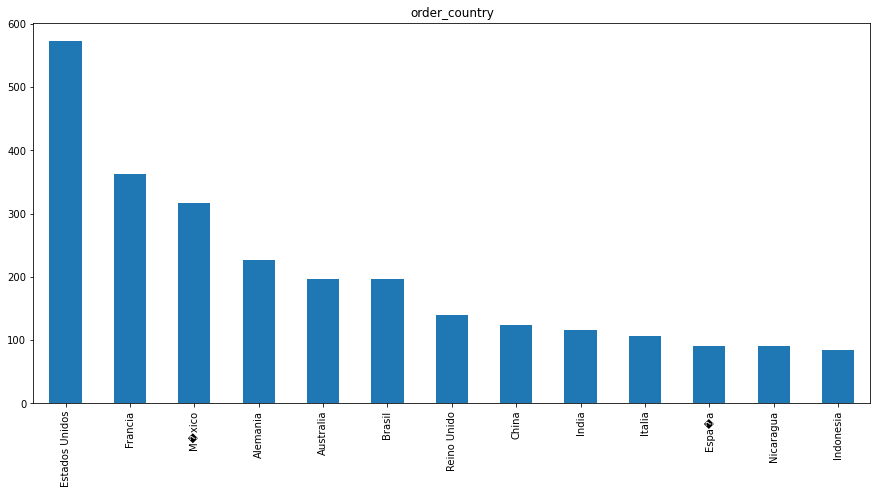

In [40]:
fraud['order_country'].value_counts().nlargest(13).plot.bar(figsize=(15,7), title="order_country");

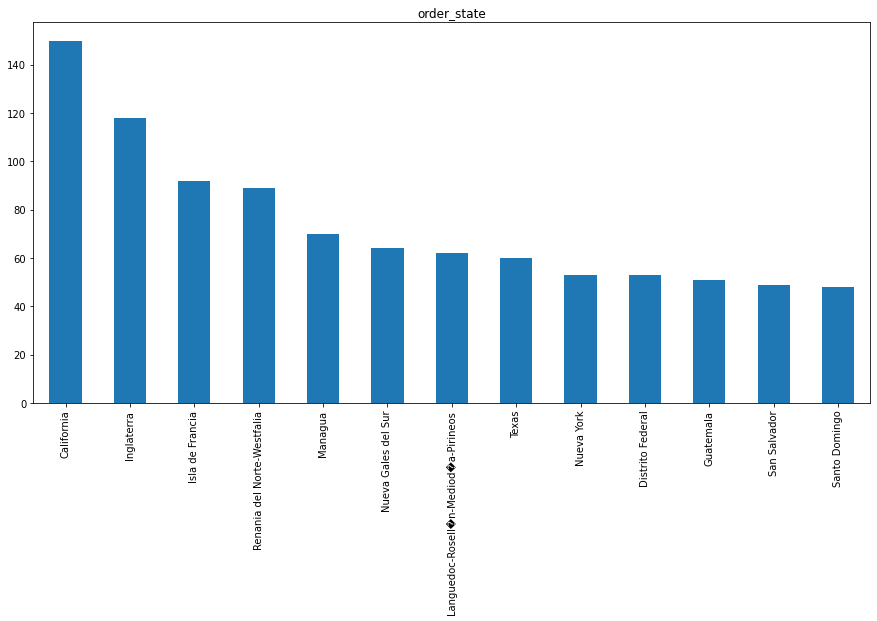

In [41]:
fraud['order_state'].value_counts().nlargest(13).plot.bar(figsize=(15,7), title="order_state");

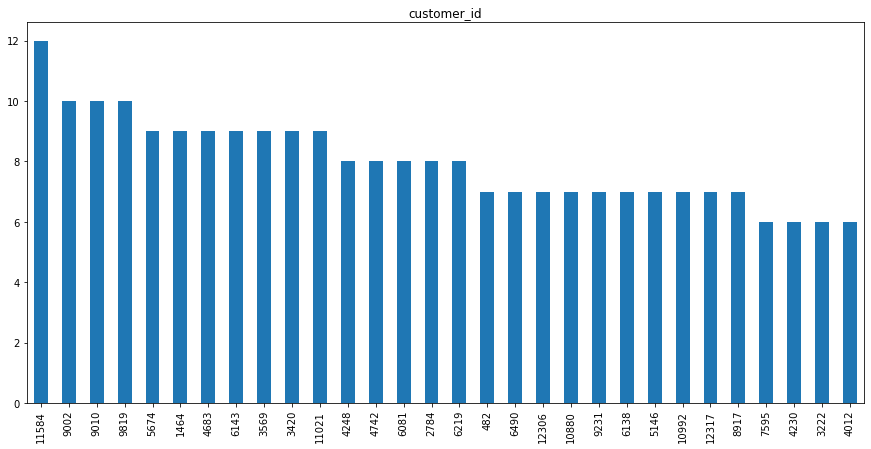

In [43]:
fraud['customer_id'].value_counts().nlargest(30).plot.bar(figsize=(15,7), title="customer_id");

In [45]:
fraud.loc[fraud['customer_id'] == 9002]

,type,actual_ship_days,estimated_ship_days,delivery_status,late_delivery_risk,category_id,category_name,customer_city,customer_id,customer_segment,customer_state,customer_zipcode,department_name,latitude,longitude,market,order_city,order_country,order_date,order_id,order_item_discount_rate,order_item_profit_ratio,order_item_quantity,order_region,order_state,order_status,product_card_id,product_name,product_price,shipping_date,shipping_mode,ship_performance,ontime
1007,TRANSFER,4,4,Shipping canceled,0,17,Cleats,New York,9002,Corporate,NY,10011.0,Apparel,40.739285,-73.998932,LATAM,Villa Canales,Guatemala,2017-02-05 20:17:00,52533,0.12,0.45,2,Central America,Guatemala,SUSPECTED_FRAUD,365,Perfect Fitness Perfect Rip Deck,59.990002,2017-02-09 20:17:00,Standard Class,0,1
1008,TRANSFER,4,4,Shipping canceled,0,17,Cleats,New York,9002,Corporate,NY,10011.0,Apparel,40.739285,-73.998932,LATAM,Villa Canales,Guatemala,2017-02-05 20:17:00,52533,0.13,0.50,2,Central America,Guatemala,SUSPECTED_FRAUD,365,Perfect Fitness Perfect Rip Deck,59.990002,2017-02-09 20:17:00,Standard Class,0,1
5159,TRANSFER,3,4,Shipping canceled,0,29,Shop By Sport,New York,9002,Corporate,NY,10011.0,Golf,40.739285,-73.998932,Europe,Paris,Francia,2017-09-01 01:05:00,66727,0.13,0.29,3,Western Europe,Isla de Francia,SUSPECTED_FRAUD,627,Under Armour Girls' Toddler Spine Surge Runni,39.990002,2017-09-04 01:05:00,Standard Class,-1,1
10023,TRANSFER,3,4,Shipping canceled,0,24,Women's Apparel,New York,9002,Corporate,NY,10011.0,Golf,40.739285,-73.998932,Europe,Paris,Francia,2017-09-01 01:05:00,66727,0.02,-0.20,4,Western Europe,Isla de Francia,SUSPECTED_FRAUD,502,Nike Men's Dri-FIT Victory Golf Polo,50.000000,2017-09-04 01:05:00,Standard Class,-1,1
10158,TRANSFER,4,4,Shipping canceled,0,9,Cardio Equipment,New York,9002,Corporate,NY,10011.0,Footwear,40.739285,-73.998932,LATAM,Villa Canales,Guatemala,2017-02-05 20:17:00,52533,0.00,0.28,4,Central America,Guatemala,SUSPECTED_FRAUD,191,Nike Men's Free 5.0+ Running Shoe,99.989998,2017-02-09 20:17:00,Standard Class,0,1
53172,TRANSFER,3,4,Shipping canceled,0,48,Water Sports,New York,9002,Corporate,NY,10011.0,Fan Shop,40.739285,-73.998932,Europe,Paris,Francia,2017-09-01 01:05:00,66727,0.03,-0.70,1,Western Europe,Isla de Francia,SUSPECTED_FRAUD,1073,Pelican Sunstream 100 Kayak,199.990005,2017-09-04 01:05:00,Standard Class,-1,1
86132,TRANSFER,4,4,Shipping canceled,0,43,Camping & Hiking,New York,9002,Corporate,NY,10011.0,Fan Shop,40.739285,-73.998932,LATAM,Villa Canales,Guatemala,2017-02-05 20:17:00,52533,0.05,0.29,1,Central America,Guatemala,SUSPECTED_FRAUD,957,Diamondback Women's Serene Classic Comfort Bi,299.980011,2017-02-09 20:17:00,Standard Class,0,1
115497,TRANSFER,3,4,Shipping canceled,0,45,Fishing,New York,9002,Corporate,NY,10011.0,Fan Shop,40.739285,-73.998932,Europe,Paris,Francia,2017-09-01 01:05:00,66727,0.15,-0.20,1,Western Europe,Isla de Francia,SUSPECTED_FRAUD,1004,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,2017-09-04 01:05:00,Standard Class,-1,1
115498,TRANSFER,3,4,Shipping canceled,0,45,Fishing,New York,9002,Corporate,NY,10011.0,Fan Shop,40.739285,-73.998932,Europe,Paris,Francia,2017-09-01 01:05:00,66727,0.16,0.46,1,Western Europe,Isla de Francia,SUSPECTED_FRAUD,1004,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,2017-09-04 01:05:00,Standard Class,-1,1
139326,TRANSFER,4,4,Shipping canceled,0,45,Fishing,New York,9002,Corporate,NY,10011.0,Fan Shop,40.739285,-73.998932,LATAM,Villa Canales,Guatemala,2017-02-05 20:17:00,52533,0.18,0.27,1,Central America,Guatemala,SUSPECTED_FRAUD,1004,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,2017-02-09 20:17:00,Standard Class,0,1
